# 古典写像系


次の時間に依存するハミルトニアン

$$
H(q,p,t) = T(p) + V(q)\sum_{n=-\infty}^{\infty}\delta(t-n) \tag{1}
$$

を考えます．第二項はポテンシャル項による摂動が時刻$t=n (n=\cdots,-1,0,1,\cdots)$ にのみ離散的に印加されていることを表しています．
(1)のハミルトンの運動方程式(ニュートン方程式)は

$$
\begin{split}
p_{n+1}  &= p_{n} - V'(q_{n})\\
q_{n+1}  &= q_{n} + T'(p_{n+1})
\end{split} 
$$

によって記述されます．
ここで$V'(q), T'(p)$はそれぞれ$\frac{dV}{dq}, \frac{dT}{dp}$．
添字の$n$は$n$回目の撃力印加を意味します．写像の式の下段の$p_{n+1}$の添字がであることに注意して下さい．

### 標準写像

$T(p)=p^2/2, V(q) = k\cos(2\pi q)/(2\pi)^2$ とすると写像は

$$
\begin{split}
q' & = q + \frac{k}{2\pi} \sin(2\pi q)\\
p' & = p + q'
\end{split}
$$

で与えられます．この写像は [標準写像](http://www.scholarpedia.org/article/Chirikov_standard_map) と呼ばれます．

### 例題 1

手始めにSimpleQmapを用いずに標準写像によって与えられる軌道列を計算してみる
なお，本ページはipython notebookを用いて作られているため，コードを実行する際には %matplotlib inline を無視しして下さい．

In [1]:
# ipython notebook を使用しない場合は下記コマンドは無視して下さい
%matplotlib inline

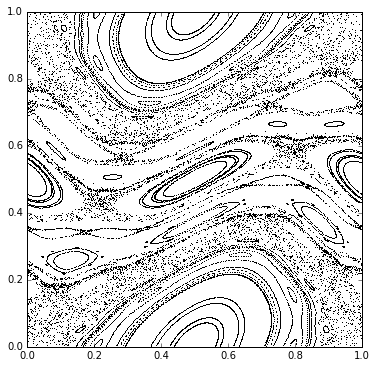

In [2]:
import numpy as np
import matplotlib.pyplot as plt

twopi = 2.0*np.pi
# 写像の定義
def Map(q,p,k):
    pp = p + k*np.sin(q*twopi)/twopi
    qq = q + pp
    return [qq,pp]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sample=50
tmax = 500
k=1
q = np.random.random(sample)
p = np.random.random(sample)
traj = [np.array([]),np.array([])]
for i in range(tmax):
    q,p = Map(q,p,k)
    q = q - np.floor(q)
    p = p - np.floor(p)
    traj[0] = np.append(traj[0],q)
    traj[1] = np.append(traj[1],p)
ax.plot(traj[0],traj[1],',k')
plt.show()

### 例題 2

SimpleQmapは標準写像のみデフォルトで定義されておりソースコードは SimpleQmap/maps.py にある．
ソースコードを見れば分かる通りごちゃごちゃ書かれているがコメント部分を取り除くと基本的に次の通りである

In [3]:
import numpy
twopi=2.0*numpy.pi

class Symplectic(object):
    pass
        
class StandardMap(Symplectic):
    def __init__(self, k):
        self.k = k

    def func0(self, x):
        return -self.k*numpy.sin(twopi*x)/twopi
        
    def func1(self, x):
        return x
        
    def ifunc0(self, x):        
        return self.k*numpy.cos(twopi*x)/(twopi*twopi)
        
    def ifunc1(self, x):        
        return 0.5*x*x

python のclass については公式を参照して下さい(http://docs.python.jp/3.5/tutorial/classes.html)

上記でで意義されたSymplectic のclassは基本的に意味の無いクラスなので無視して下さい．
StandardMapのクラスは func0, func1, ifunc0, ifunc1のmethodが定義されています．
それぞれ(1)式のハミルトニアンの

func0: $\frac{dV(q)}{dq}$
    
func1: $\frac{dT(p)}{dp}$
    
ifunc0: $V(q)$
    
ifunc1: $T(p)$

に対応します．無理にこのクラスを使う必要はありませんが，SimpleQmapを使って上のプログラムと同じモノを書くと次のようになる．

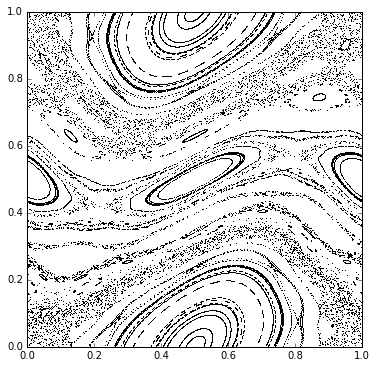

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleQmap as sq

twopi = 2.0*np.pi

def Map(q,p, cmap):
    pp = p - cmap.func0(q)
    qq = q + cmap.func1(pp)
    return [qq,pp]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sample=50
tmax = 500
k=1
cmap = sq.StandardMap(k)
q = np.random.random(sample)
p = np.random.random(sample)
traj = [np.array([]),np.array([])]
for i in range(tmax):
    q,p = Map(q,p,cmap)
    q = q - np.floor(q)
    p = p - np.floor(p)
    traj[0] = np.append(traj[0],q)
    traj[1] = np.append(traj[1],p)
ax.plot(traj[0],traj[1],',k')
plt.show()

### 継承の例

SimpleQmapでは標準写像しか定義されていませんが，実際には異なる写像を定義したい場合があるでしょう．
ここでは例題としてStandardMap のclassを継承してHarperMapを定義します．

Harper写像は

$$
\begin{split}
p_{n+1} &= q_{n} + k\sin(2\pi q_n)/(2\pi)\\
q_{n+1} & = q_{n} + a\sin(2\pi p_{n+1})/(2\pi)
\end{split}
$$

と定義します．そうすると $V(q)$の定義が標準写像と共通する為，T(p)の定義を書き換える(オーバーライド)するだけですみます．
プログラムは例えば以下の様になります．

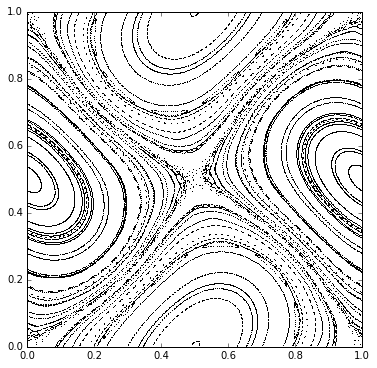

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleQmap as sq

twopi = 2.0*np.pi
class HarperMap(sq.StandardMap):
    def __init__(self, k,a):
        sq.StandardMap.__init__(self,k)
        self.a = a
    def func1(self, x):
        return a*np.sin(twopi*x)/twopi
    def ifunc1(self,x):
        return -a*np.cos(twopi*x)/twopi/twopi

def Map(q,p, cmap):
    pp = p - cmap.func0(q)
    qq = q + cmap.func1(pp)
    return [qq,pp]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sample=50
tmax = 500
k,a=1,1
cmap = HarperMap(k,a)
q = np.random.random(sample)
p = np.random.random(sample)
traj = [np.array([]),np.array([])]
for i in range(tmax):
    q,p = Map(q,p,cmap)
    q = q - np.floor(q)
    p = p - np.floor(p)
    traj[0] = np.append(traj[0],q)
    traj[1] = np.append(traj[1],p)
ax.plot(traj[0],traj[1],',k')
plt.show()